Charting new COVID-19 cases in Ontario.
Initially just Ottawa Public Health Unit (PHU).

Richard Akerman
April 3, 2021

Plan is to extract from Ontario open data CSV.

Code developed in [Google Colaboratory](https://colab.research.google.com/) will be posted to GitHub (scilib) with MIT License.

Thanks to José Aguilera for the presentation “The Data Analysis Process – using Jupyter Notebook (Python)” which provided the basis for the many of the techniques used in this code.

Find out Python coding conventions.
[PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/)

Had to read waaaay down in the document to find the naming conventions.

> Function names should be lowercase, with words separated by underscores as necessary to improve readability.

> Variable names follow the same convention as function names.

> In Python, single-quoted strings and double-quoted strings are the same. This PEP does not make a recommendation for this. 

(Seems like most use single quotes though.  I'm used to using double quotes to prevent the string being evaluated.)

# Set up

In [1]:
# import all packages
import pandas as pd
import matplotlib.pyplot as plt


# Download a file

StackOverflow - [Given a URL to a text file, what is the simplest way to read the contents of the text file?](https://stackoverflow.com/questions/1393324/given-a-url-to-a-text-file-what-is-the-simplest-way-to-read-the-contents-of-the)

There is no "urllib2" (in Python 3).
Use urllib.

StackOverflow - [How to read a CSV file from a URL with Python?](https://stackoverflow.com/questions/16283799/how-to-read-a-csv-file-from-a-url-with-python)

Considerations:

*   will break if URL changes
*   will break if CSV file format changes
*   some potential file size risk if the file is gigantic
*   should be checking for returned error codes

Should check if there is a way to access the data through an API rather than downloading the CSV, but CSV is easy to parse for now.

All Ontario COVID-19 open data - [Ontario Data Catalogue matching "COVID-19"](https://data.ontario.ca/dataset?keywords_en=COVID-19)

Specific dataset is on [Status of COVID-19 cases in Ontario](https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario) page, subsection "Daily change in cases by PHU" - CSV file is https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv


In [2]:
# Ontario COVID-19 open data - new cases
# put URL in quotes - (but make it a variable anyway for ease of reuse)
# tried urllib and csv lib which didn't work, but pandas works
# you can use the same pandas format to read from a local file 

new_cases_url = "https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv"
new_cases_data = pd.read_csv(new_cases_url)

(Optional) Have a look at the data.

In [3]:
# do sample and info to have a look at the data - all numbers are float64
new_cases_data.sample(5)
new_cases_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            537 non-null    object 
 1   Algoma_District                 534 non-null    float64
 2   Brant_County                    534 non-null    float64
 3   Chatham_Kent                    534 non-null    float64
 4   Durham_Region                   534 non-null    float64
 5   Eastern_Ontario                 534 non-null    float64
 6   Grey_Bruce                      534 non-null    float64
 7   Haldimand_Norfolk               534 non-null    float64
 8   Haliburton_Kawartha_Pine_Ridge  534 non-null    float64
 9   Halton_Region                   534 non-null    float64
 10  City_of_Hamilton                534 non-null    float64
 11  Hastings_Prince_Edward          534 non-null    float64
 12  Huron_Perth                     534 

# Isolate/extract the Ottawa_Public_Health unit column

Towards Data Science - [Extract Rows/Columns from A Dataframe in Python & R](https://towardsdatascience.com/extract-rows-columns-from-a-dataframe-in-python-r-678e5b6743d6)

Above reference useful but also confusing as it is easy to mix up the R code with the Python code.

Note: Medium is not a good site to share code examples, because it pops up a quote thing when you try to copy and paste, rather than just letting you copy.

In [5]:
# make a copy just in case I want to make changes / delete columns etc.
ottawa_new_cases_data = new_cases_data

# seems like you can assign your own names to columns which I don't want to do

# can get a list of all columns
# ottawa_new_cases_data.columns

# there should already be a column called Ottawa_Public_Health
# UPDATE 2021-07-07 column is now called City_of_Ottawa
desired_column = "City_of_Ottawa"

# print(ottawa_new_cases_data[[desired_column]])

# display the top 5 largest case days
# print(ottawa_new_cases_data[['Date',desired_column]].nlargest(5, desired_column))

# print with dates

# print(ottawa_new_cases_data[['Date', desired_column]])

# Plot

matplotlib - [matplotlib.pyplot.grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)

           Date  City_of_Ottawa
532  2021-09-07            30.0
533  2021-09-08            22.0
534  2021-09-09            72.0
535  2021-09-10            52.0
536  2021-09-11            73.0




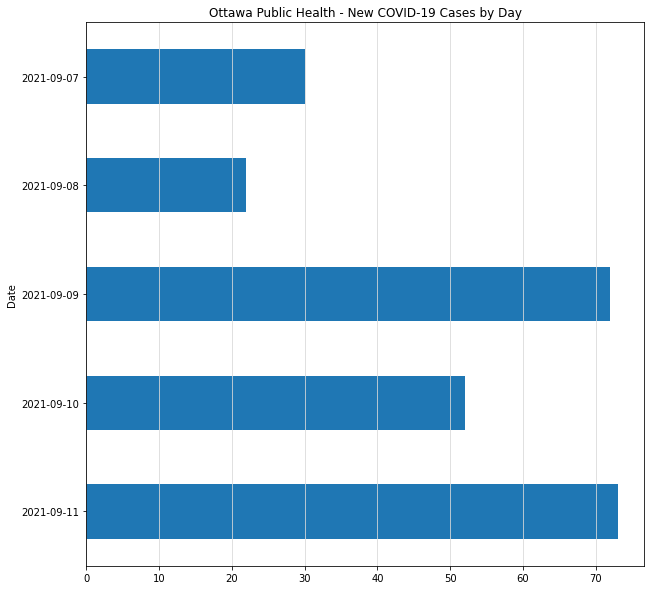

In [6]:
# try a horizontal bar plot
# use figsize to set size
# TODO: exclude negative values?

# the line below will plot all of the data in a giant chart
#ottawa_new_cases_data.plot.barh(y=desired_column,x=0,figsize=(40,80),legend=False,title="Ottawa Public Health - New COVID-19 Cases by Day")

# add table of values
print(ottawa_new_cases_data[['Date', desired_column]].tail(5))
print("\n")

# let's do the last 5 days
# that way it should show up better on Twitter
ax = ottawa_new_cases_data.tail(5).plot.barh(y=desired_column,x=0,figsize=(10,10),legend=False,title="Ottawa Public Health - New COVID-19 Cases by Day")
ax.grid(axis='x',color='0.85')
# flip it to put newer dates at the bottom
ax.invert_yaxis()